In [138]:
import pygyre as pg
import matplotlib.pyplot as plt
import numpy as np

In [139]:
s = pg.read_output('summary.h5')

In [140]:
s

E_norm,M_star,R_star,freq,l,n_g,n_p,n_pg,omega
float64,float64,float64,complex128,int32,int32,int32,int32,complex128
0.0018363028341379804,1.5907278965584403e+34,338953919535.8419,(1.2283284290808767+0j),2,11,0,-11,(0.5409919580933127+0j)
0.0073366874830066015,1.5907278965584403e+34,338953919535.8419,(1.363906850397932+0j),2,10,0,-10,(0.6007046814065696+0j)
0.00929307743458161,1.5907278965584403e+34,338953919535.8419,(1.4380848158841582+0j),2,9,0,-9,(0.6333748385450798+0j)
0.01213294301435464,1.5907278965584403e+34,338953919535.8419,(1.641573737970775+0j),2,8,0,-8,(0.7229973432462945+0j)
0.02697358145740349,1.5907278965584403e+34,338953919535.8419,(1.9403696499695524+0j),2,7,0,-7,(0.8545958487237351+0j)
0.10203963982447985,1.5907278965584403e+34,338953919535.8419,(2.151827421344634+0j),2,6,0,-6,(0.9477280689686521+0j)
0.049365033158640305,1.5907278965584403e+34,338953919535.8419,(2.4876696186748473+0j),2,5,0,-5,(1.0956428478197653+0j)
0.06866851374306342,1.5907278965584403e+34,338953919535.8419,(3.193282387597109+0j),2,4,0,-4,(1.4064154591811557+0j)
0.20834200164344194,1.5907278965584403e+34,338953919535.8419,(3.8103739310547615+0j),2,3,0,-3,(1.6782007199585067+0j)


In [207]:
d = pg.read_output('detail.l2.n+5.h5')

In [208]:
c0 = 299792458
GNewton = 6.67408*10**(-11)

Rstar=s['R_star'][1] / 100
Mstar = s['M_star'][1] / 1000
M_r = d['M_r'] / 1000

rho_Dles = (d['rho'] * 10**3) * Rstar**2 * GNewton/ c0**2
M_Dles = Mstar * GNewton/ c0**2 / Rstar
Mr_Dles = M_r * GNewton/ c0**2 / Rstar

In [209]:
Rstar / (6.957 * 10 ** 8)

4.872127634552853

In [210]:
1/((rho_Dles[0]/(M_Dles/ (4/3 *np.pi)))**(1/3)*0.5)

0.4035113573619164

In [211]:
(rho_Dles[0]/(M_Dles/ (4/3 *np.pi)))

121.76506303445066

In [212]:
np.trapz(4.0*(np.pi)*(d['x'])*(rho_Dles)*Mr_Dles,d['x']) / (M_Dles**2)

1.8594957874153824

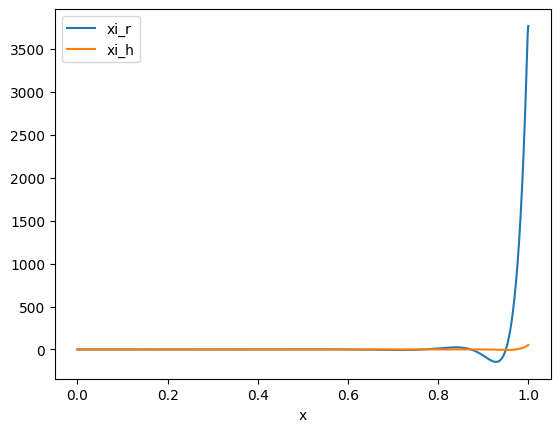

In [213]:

plt.figure()

plt.plot(d['x'], d['xi_r'].real, label='xi_r')
plt.plot(d['x'], d['xi_h'].real, label='xi_h')

plt.xlabel('x')

plt.legend()

/tmp/ipykernel_3443193/2715802805.py:11: RuntimeWarning: divide by zero encountered in divide
  d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)


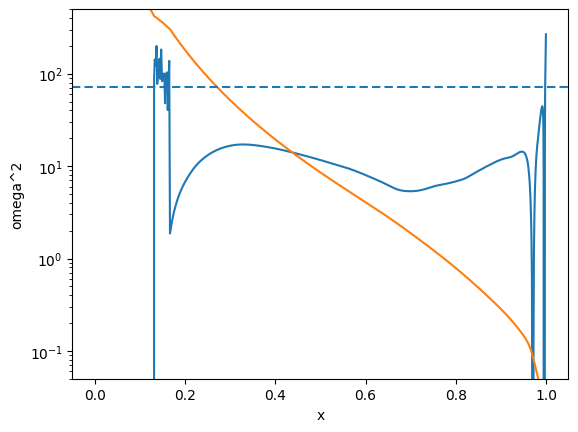

In [214]:
l = d.meta['l']
omega = d.meta['omega']

x = d['x']
V = d['V_2']*d['x']**2
As = d['As']
c_1 = d['c_1']
Gamma_1 = d['Gamma_1']

d['N2'] = d['As']/d['c_1']
d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)

# Plot the propagation diagram

plt.figure()

plt.plot(d['x'], d['N2'], label='N^2')
plt.plot(d['x'], d['Sl2'], label='S_l^2')

plt.axhline(omega.real**2, dashes=(4,2))

plt.xlabel('x')
plt.ylabel('omega^2')

plt.ylim(5e-2, 5e2)
plt.yscale('log')

In [215]:
D_overlap = np.trapz(rho_Dles *( d['x']**3 * d['xi_r'] + 3 * d['x']**2 * (d['x'] * d['xi_h'])),d['x']) / M_Dles

In [216]:
N_overlap= np.trapz(rho_Dles *( d['x']**2 * d['xi_r']**2 + 6 * (d['x'] * d['xi_h'])**2 ),d['x']) / M_Dles

In [217]:
D_overlap **2 / N_overlap

(0.00018225450750105048-0j)